As a disclaimer, this was meant to run on google colab, if it is run this way, you may need to uncomment the git clone in the following cell

In [ ]:
#%cd /content/fyp_robotics/
#!git pull
# !git clone https://github.com/JoshuaDarmon/fyp_robotics.git

Cloning into 'fyp_robotics'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 153 (delta 66), reused 113 (delta 33), pack-reused 0
Receiving objects: 100% (153/153), 15.61 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [2]:
# Installing PyBullet using pip should take around 20 seconds, since we use precompiled Linux wheels.
# For more info, check the PyBullet quickstart guide here:
# https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit#heading=h.2ye70wns7io3
#actually it takes 9 minutes
#%%time
!pip install pybullet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:02


In [5]:
# Install required library

# Using tfp-nightly due to https://github.com/tensorflow/probability/issues/1752
#!pip install rlds tf_agents dm-reverb[tensorflow] apache_beam tfp-nightly tensorflow-hub

!pip install rlds tf_agents dm-reverb[tensorflow] apache_beam tensorflow-probability tensorflow-hub

  Using cached rlds-0.1.8-py3-none-manylinux2010_x86_64.whl.metadata (1.7 kB)
  Using cached tf_agents-0.19.0-py3-none-any.whl.metadata (12 kB)
  Using cached apache_beam-2.56.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorflow_probability-0.24.0-py2.py3-none-any.whl.metadata (13 kB)
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached dm_reverb-0.14.0-cp311-cp311-manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gym-0.23.0-py3-none-any.whl
  Using cached pillow-10.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached protobuf-5.26.1-cp37-abi3-manylinux2014_x86_64.whl.met

In [6]:
# # Download zipped checkpoint folder
# !gsutil -m cp -r gs://gresearch/robotics/open_x_embodiment_and_rt_x_oss/rt_1_x_tf_trained_for_002272480_step.zip .

/bin/bash: line 1: gsutil: command not found


In [7]:
# # Unzip zipped checkpoint folder

# !unzip rt_1_x_tf_trained_for_002272480_step.zip

unzip:  cannot find or open rt_1_x_tf_trained_for_002272480_step.zip, rt_1_x_tf_trained_for_002272480_step.zip.zip or rt_1_x_tf_trained_for_002272480_step.zip.ZIP.


In [11]:
#colab code to run the model
import tensorflow as tf
#import tensorflow_datasets as tfds

import rlds
from PIL import Image
import numpy as np
from tf_agents.policies import py_tf_eager_policy
import tf_agents
from tf_agents.trajectories import time_step as ts
# from IPython import display
# from collections import defaultdict
# import matplotlib.pyplot as plt


def as_gif(images):
  # Render the images as the gif:
  images[0].save('/content/temp.gif', save_all=True, append_images=images[1:], duration=50, loop=0)
  gif_bytes = open('/content/temp.gif','rb').read()
  return gif_bytes


In [15]:
# Load TF model checkpoint
# Replace saved_model_path with path to the parent folder of
# the folder rt_1_x_tf_trained_for_002272480_step.
# saved_model_path = "/content/rt_1_x_tf_trained_for_002272480_step/"


saved_model_path = "model/robotics_open_x_embodiment_and_rt_x_oss_rt_1_x_tf_trained_for_002272480_step/rt_1_x_tf_trained_for_002272480_step/"

tfa_policy = py_tf_eager_policy.SavedModelPyTFEagerPolicy(
    model_path=saved_model_path,
    load_specs_from_pbtxt=True,
    use_tf_function=True)

In [21]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install matplotlib

ln: failed to create symbolic link '/usr/bin/nvidia-smi': Permission denied
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.7 MB/s eta 0:00:002.4 MB/s eta 0:00:01
  Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 27.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 21.6 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)


In [23]:
#colab code for pybullet

#you can enable the GPU by changing the runtime
import os
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import GPUtil as GPU
import sys
from environment.panda_robot.panda_robot import PandaRobot


os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.3'
os.environ['MESA_GLSL_VERSION_OVERRIDE'] = '330'
# %matplotlib inline


def reset_env():
  p.connect(p.DIRECT)
  #allow to find the assets (URDF, obj, textures etc)
  p.setAdditionalSearchPath(pd.getDataPath())
  #optionally enable GPU for faster rendering in pybullet.getCameraImage
  enableGPU = False

  # Get all device ids and their processing and memory utiliazion
  # (deviceIds, gpuUtil, memUtil) = GPU.getGPUs()

  # Print os and python version information
  print('OS: ' + sys.platform)
  print(sys.version)

  # Print package name and version number
  print(GPU.__name__ + ' ' + GPU.__version__)

  # # Show the utilization of all GPUs in a nice table
  # GPU.showUtilization()

  # # Show all stats of all GPUs in a nice table
  # GPU.showUtilization(all=True)

  # NOTE: If all your GPUs currently have a memory consumption larger than 1%,
  # this step will fail. It's not a bug! It is intended to do so, if it does not
  # find an available GPU.
  GPUs = GPU.getGPUs()
  numGPUs = len(GPU.getGPUs())
  print("numGPUs=",numGPUs)
  if numGPUs > 0:
    enableGPU = True
  eglPluginId = -1
  # if enableGPU:
  #   import pkgutil
  #   egl = pkgutil.get_loader('eglRenderer')
  #   if (egl):
  #     eglPluginId = p.loadPlugin(egl.get_filename(), "_eglRendererPlugin")
  #   else:
  #     eglPluginId = p.loadPlugin("eglRendererPlugin")

  # if eglPluginId>=0:
  #   print("Using GPU hardware (eglRenderer)")
  # else:
  #   print("using CPU renderer (TinyRenderer)")



  p.resetSimulation()
  p.configureDebugVisualizer(p.COV_ENABLE_GUI)
  useFixedBase = True
  flags = p.URDF_INITIALIZE_SAT_FEATURES


  planeId = p.loadURDF("plane.urdf")
  tableId = p.loadURDF("table/table.urdf",[0.3,0.55,-0.4])
  #tableId = p.loadURDF("/content/fyp_robotics/environment/table.urdf",[0.3,0.55,-0.4])

  #0.65 to be on top of the table on dim3
  cube_wall = p.loadURDF("environment/cube.urdf", basePosition=[0,2.3,1.4],globalScaling=2.5)
  cube_wall2 = p.loadURDF("environment/cube.urdf", basePosition=[-1.6,-0.3,1.4],globalScaling=2.5)

  cup_id = p.loadURDF("environment/orange_cup/model.urdf", basePosition=[np.random.uniform(0.4,0.6),
                                                                                               np.random.uniform(0.25,0.45),
                                                                                               0.3],
                                                                                               globalScaling=1.2)
  knife_id = p.loadURDF("environment/knife/model.urdf", basePosition=[np.random.uniform(0.5,0.7),
                                                                                            np.random.uniform(0.1,0.2),
                                                                                            0.3]
                                                                                          , globalScaling=1)



  p.setGravity(0, 0, -9.8)
  for i in range(50):
    p.stepSimulation()




In [28]:
import numpy as np
# import imageio_ffmpeg
from matplotlib import pylab

reset_env()
franka1 = PandaRobot(include_gripper=True,x=0.2,y=0,z=0)

# franka2 = PandaRobot(include_gripper=True,x=1.2,y=0.3,z=0)


OS: linux
3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
GPUtil 1.4.0
numGPUs= 0
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,182]:
not found [environment/cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,174]:
Unsupported texture image format [./cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,182]:
not found [environment/cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,174]:
Unsupported texture image format [./cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,182]:
not found [environment/cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,174]:
Unsupported texture image format [./cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,182]:
not found [environment/cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,174]:
Unsupported texture image form

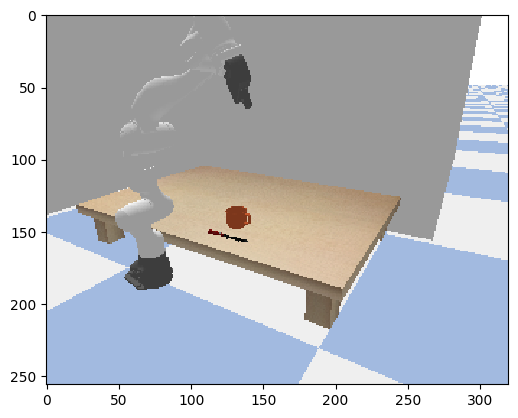

In [29]:
#here for debugging before setting up specific robot camera
cam_target_pos = [0.55, 0.5, 0.3]
cam_distance = 1.6
cam_yaw, cam_pitch, cam_roll = 30, -20, 0
cam_width, cam_height = 320, 256

cam_up, cam_up_axis_idx, cam_near_plane, cam_far_plane, cam_fov = [0, 0, 1], 2, 0.01, 100, 60

cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, cam_up_axis_idx)
cam_projection_matrix = p.computeProjectionMatrixFOV(cam_fov, cam_width*1./cam_height, cam_near_plane, cam_far_plane)
image = p.getCameraImage(cam_width, cam_height, cam_view_matrix, cam_projection_matrix)
w = image[0]  #width of the image, in pixels
h = image[1]  #height of the image, in pixels
rgb = image[2]  #color data RGB
dep = image[3]  #depth data

#image = np.reshape(rgb, (h, w, 4))
image = rgb[:,:,:3]
#image = image * (1. / 255.)
pylab.imshow(image, interpolation='none', animated=True, label="pybullet")


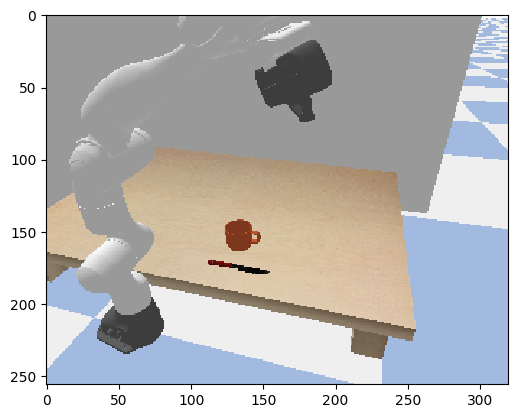

In [30]:
class camera:
  def __init__(self,yaw,pitch,roll,distance):
    self.yaw = yaw
    self.pitch = pitch
    self.roll = roll
    self.distance = distance
  def gen_image(self):
    cam_target_pos = [0.55, 0.5, 0.3]
    #cam_distance = 1.2
    cam_width, cam_height = 320, 256

    cam_up, cam_up_axis_idx, cam_near_plane, cam_far_plane, cam_fov = [0, 0, 1], 2, 0.01, 100, 60

    cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(cam_target_pos, self.distance, self.yaw, self.pitch, self.roll, cam_up_axis_idx)
    cam_projection_matrix = p.computeProjectionMatrixFOV(cam_fov, cam_width*1./cam_height, cam_near_plane, cam_far_plane)
    image = p.getCameraImage(cam_width, cam_height, cam_view_matrix, cam_projection_matrix)
    w = image[0]  #width of the image, in pixels
    h = image[1]  #height of the image, in pixels
    rgb = image[2]  #color data RGB
    dep = image[3]  #depth data

    #image = np.reshape(rgb, (h, w, 4))
    image = rgb[:,:,:3]
    return image

camera_robot_1 = camera(15,-30,0,1.3)
camera_robot_2 = camera(70,-30,0,1.3)
display_camera = camera(30,-20,0,1.6)
pylab.imshow(camera_robot_1.gen_image(), interpolation='none', animated=True, label="pybullet")


In [32]:
import tensorflow_hub as hub
embedder = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")#tf.saved_model.load("sentence_encoder")


In [33]:
# !pip install numpngw
# from numpngw import write_apng
#!pip install opencv-python
# from IPython import display
# import cv2

ModuleNotFoundError: No module named 'cv2'

In [34]:
class robot_model:
  def __init__(self,camera):
    self.camera = camera
    # Obtain a dummy observation, where the features are all 0
    self.observation = tf_agents.specs.zero_spec_nest(tf_agents.specs.from_spec(tfa_policy.time_step_spec.observation))
    self.policy_state = tfa_policy.get_initial_state(batch_size=1)

  def re_initialize(self):
    self.policy_state = tfa_policy.get_initial_state(batch_size=1)

  def set_task(self,task: str):
    ## set the task string
    self.task = task
    self.observation['natural_language_instruction'] = tf.convert_to_tensor(task)
    self.observation['natural_language_embedding'] = embedder([task])[0].numpy()
  def get_task(self):
    return self.task

  def update_observation(self):
    img = self.camera.gen_image()
    self.observation['image'] = tf.cast(img,tf.uint8)
  def generate_action(self):
    tfa_time_step = ts.transition(self.observation, reward=np.zeros((), dtype=np.float32))
    policy_step = tfa_policy.action(tfa_time_step, self.policy_state)
    self.policy_state = policy_step.state
    action = policy_step.action
    return action

  def add_typos(self,amount:int,proportion=[0.5,0.5]):
    sentence = self.get_task()
    words = sentence.split()
    for i in range(amount):
      method = np.random.choice([0,1],p=proportion)
      match (method):
        case 0:
          words = nearby_key(words)
        case 1:
          words = substitution(words)

    new_task = " ".join(words)
    print(new_task)
    self.set_task(new_task)
    return new_task

  def noisy_update(self,std):
    img = self.camera.gen_image()
    noise = np.random.normal(0,std,img.shape)
    noisy_image = np.clip(img+noise,0,255)
    self.observation['image'] = tf.cast(noisy_image,tf.uint8)



In [ ]:
# # Obtain a dummy observation, where the features are all 0
# observation = tf_agents.specs.zero_spec_nest(tf_agents.specs.from_spec(tfa_policy.time_step_spec.observation))
# policy_state = tfa_policy.get_initial_state(batch_size=1)
# observation['image'] = tf.cast(image,tf.uint8)
# #'pick up the cube on the table and then drop it'
# #"push the cube that is on the table"
# #'pick up the orange cup on the table and then drop it'
# #'grab the cup'
# #'place the cup to the right of the knife'
# observation['natural_language_instruction'] = tf.convert_to_tensor('Knock the cup off the table')
# observation['natural_language_embedding'] = embedder(['Knock the cup off the table'])[0].numpy()

# #old code for reference


In [35]:
def move_robot(robot,action):

    #print(action)
    info = p.getLinkState(robot.robot_id,6)
    end_effector_position = p.getJointState(robot.robot_id,7)[0]
    #print(info[0])
    end_effector_orientation = p.getEulerFromQuaternion(info[1])
    #print(end_effector_orientation)
    #print(action['world_vector'])
    target_position = action['world_vector'] +end_effector_position
    target_orientation = p.getQuaternionFromEuler(end_effector_orientation + action['rotation_delta'])
    #we remove the last joint because it's the gripper
    #joints = franka.calculate_inverse_kinematics(target_position,None)#,target_orientation)#[:7]
    joints = p.calculateInverseKinematics(robot.robot_id, 7, target_position)#,target_orientation)
    #print(list(joints))
    #franka.set_target_positions(list(joints))
    # p.setJointMotorControlArray(bodyUniqueId=franka.robot_id,
    #                                   jointIndices=franka.joints,
    #                                   controlMode=p.POSITION_CONTROL,
    #                                   targetPositions=joints)
    for j in range(7):
      p.setJointMotorControl2(bodyUniqueId=robot.robot_id,
                                      jointIndex=robot.joints[j],
                                      controlMode=p.POSITION_CONTROL,
                                      targetPosition=joints[j]
                                      )
    if action['gripper_closedness_action'] == 1:
      #print("closing_grippers")
      p.setJointMotorControl2(robot.robot_id,8,p.POSITION_CONTROL,1,force=5)
      p.setJointMotorControl2(robot.robot_id,9,p.POSITION_CONTROL,1,force=5)
    if action['gripper_closedness_action'] == -1:
      p.setJointMotorControl2(robot.robot_id,8,p.POSITION_CONTROL,0,force=5)
      p.setJointMotorControl2(robot.robot_id,9,p.POSITION_CONTROL,0,force=5)


In [36]:
#def experiment helpers:

def nearby_key(word_list):
  word_index = np.random.randint(len(word_list))
  word = word_list[word_index]
  #convert to lsit
  word = list(word)
  rand_index = np.random.randint(len(word))
  character = word[rand_index]
  #list taken from https://stackoverflow.com/a/56909841
  nearbykeys = {
    'a': ['q','w','s','x','z'],
    'b': ['v','g','h','n'],
    'c': ['x','d','f','v'],
    'd': ['s','e','r','f','c','x'],
    'e': ['w','s','d','r'],
    'f': ['d','r','t','g','v','c'],
    'g': ['f','t','y','h','b','v'],
    'h': ['g','y','u','j','n','b'],
    'i': ['u','j','k','o'],
    'j': ['h','u','i','k','n','m'],
    'k': ['j','i','o','l','m'],
    'l': ['k','o','p'],
    'm': ['n','j','k','l'],
    'n': ['b','h','j','m'],
    'o': ['i','k','l','p'],
    'p': ['o','l'],
    'q': ['w','a','s'],
    'r': ['e','d','f','t'],
    's': ['w','e','d','x','z','a'],
    't': ['r','f','g','y'],
    'u': ['y','h','j','i'],
    'v': ['c','f','g','v','b'],
    'w': ['q','a','s','e'],
    'x': ['z','s','d','c'],
    'y': ['t','g','h','u'],
    'z': ['a','s','x'],
    ' ': ['c','v','b','n','m']
  }
  if character in nearbykeys:
    letter = np.random.choice(nearbykeys[character])
    word[rand_index] = letter
  else:
    raise ValueError("not an accepted character")
  word = "".join(word)
  word_list[word_index] = word
  return word_list

def substitution(word_list):
  word_index = np.random.randint(len(word_list))
  word = word_list[word_index]
  #convert to lsit
  word = list(word)
  rand_index = np.random.randint(len(word))
  direction = np.random.choice(["left","right"])
  #depending on where the word is do something different
  if rand_index == 0:
      if direction == "left" and word_index>0:
        prev_word = word_list[word_index-1]
        #swap the space with first char by adding it to previous word (if there is one)
        print(prev_word)
        pr = list(prev_word)
        pr.append(word[0])
        word_list[word_index-1] = "".join(pr)
        word[0] = ""
      else:
        if len(word)==1:
          nearby_key(word_list)
        else:
          word[0], word[1] = word[1], word[0]
  elif rand_index == len(word)-1:
    if direction == "right" and word_index<len(word_list)-1:
      next_word = word_list[word_index+1]
      #swap the space with last char by adding it to previous word (if there is one)

      nx = list(next_word)
      nx.insert(0,word[-1])
      word_list[word_index+1] = "".join(nx)
      word[-1] = ""
    else:
      word[-1],word[-2] = word[-2], word[-1]
  else:
    #in the middle of word, straightforward
    if direction == "left":
      word[rand_index],word[rand_index-1] = word[rand_index-1], word[rand_index]
    else:
      word[rand_index],word[rand_index+1] = word[rand_index+1], word[rand_index]
  #put it back into a word after changes
  word = "".join(word)
  word_list[word_index] = word
  word_list[word_index] = word
  return word_list






def gen_random_cube():
  random_cubes = p.loadURDF("/content/fyp_robotics/environment/cube.urdf", basePosition=[np.random.uniform(-0.6,1),
                                                                                         np.random.uniform(0,0.5),
                                                                                         1.5],globalScaling=0.05)



In [40]:
robot_model_1 = robot_model(camera_robot_1)
robot_model_2 = robot_model(camera_robot_2)

np.random.seed(2)
# for i in range(0,5):

# obj =["cup","mug","teacup","drink","tumbler"]
# verb = ["pick_up","lift", "grasp", "take_up", "raise"]

# verbose = ["Pick up the mug",
# "kindly pick up the mug",
# "Do kindly pick up the mug",
# "Would you kindly pick up the mug",
# "Kindly pick the mug from the table",
# "Do kindly pick up the mug from the table",
# "Would you kindly pick up the mug from the table"]


# for o in obj:
#   for v in verb:
# k=4
# setting = ["1", "2", "both"]
# sigma = [0,2.5,5,7.5,10]
# for s in sigma:
#   for j in range(20):

#iteration_prompts = []
robot_model_1.set_task(f'pick up the mug')
# typoed_task = robot_model_1.add_typos(i)
# iteration_prompts.append(typoed_task)
# robot_model_2 = robot_model(camera_robot_2)
# robot_model_2.set_task('pick up the mug')
t=0
reset_env()
robot_model_1.re_initialize()
franka1 = PandaRobot(include_gripper=True,x=0.2,y=0,z=0)
franka1.reset_state()

# robot_model_2.re_initialize()
# franka2 = PandaRobot(include_gripper=True,x=1.2,y=0.3,z=0)
# franka2.reset_state()

p.stepSimulation()
image= display_camera.gen_image()
# image = p.getCameraImage(cam_width, cam_height, cam_view_matrix, cam_projection_matrix)[2][:,:,:3]
frames = []
p.setJointMotorControl2(franka1.robot_id,8,p.POSITION_CONTROL,0,force=100)
p.setJointMotorControl2(franka1.robot_id,9,p.POSITION_CONTROL,0,force=100)
while t<640:
    if t%4 == 0:
    #image = display_camera.gen_image()
        image = camera_robot_1.gen_image()
        frames.append(image)

    if t%20==0:
    # if s == "1" or s == "both":
        robot_model_1.update_observation()
        action = robot_model_1.generate_action()
        move_robot(franka1,action)
        # if s=="2" or s=="both":
        #   robot_model_2.update_observation()
        #   action = robot_model_2.generate_action()
        #   move_robot(franka2,action)
    p.stepSimulation()
    

    # if t%200 == 0:
    #   #random object dropping
    #   gen_random_cube()
    t+=1

imgs = [Image.fromarray(img) for img in frames]

# sc = imgs[200]
# sc.save("dropping cubes.png")

#display.Image(as_gif(imgs))
print("creating animated png, please about 5 seconds")
# %time write_apng(f"typos/{i}_typos.png", frames, delay=100)
imgs[0].save("vid.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)
#%time Image(filename=f"typos/{i}_typos.png")
# prompts.append(iteration_prompts)


OS: linux
3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
GPUtil 1.4.0
numGPUs= 0
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,182]:
not found [environment/cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,174]:
Unsupported texture image format [./cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,182]:
not found [environment/cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,174]:
Unsupported texture image format [./cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,182]:
not found [environment/cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,174]:
Unsupported texture image format [./cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,182]:
not found [environment/cube.png]
b3Warning[examples/Importers/ImportMeshUtility/b3ImportMeshUtility.cpp,174]:
Unsupported texture image form

NameError: name 's' is not defined